In [1]:
import pandas as pd

In [5]:
#blood = pd.read_csv("https://raw.githubusercontent.com/chendaniely/ds4biomed/learner/data/medicaldata_blood_storage.csv")
blood = pd.read_csv("data/medicaldata_blood_storage.csv")

In [6]:
blood

,RBC.Age.Group,Median.RBC.Age,Age,AA,FamHx,PVol,TVol,T.Stage,bGS,BN+,OrganConfined,PreopPSA,PreopTherapy,Units,sGS,AnyAdjTherapy,AdjRadTherapy,Recurrence,Censor,TimeToRecurrence
0,3,25,72.1,0,0,54.0,3.0,1.0,3.0,0,0,14.08,1,6,1,0,0,1,0,2.67
1,3,25,73.6,0,0,43.2,3.0,2.0,2.0,0,1,10.50,0,2,3,0,0,1,0,47.63
2,3,25,67.5,0,0,102.7,1.0,1.0,3.0,0,1,6.98,1,1,1,0,0,0,1,14.10
3,2,15,65.8,0,0,46.0,1.0,1.0,1.0,0,1,4.40,0,2,3,0,0,0,1,59.47
4,2,15,63.2,0,0,60.0,2.0,1.0,2.0,0,1,21.40,0,3,3,0,0,0,1,1.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,1,10,54.8,0,0,25.6,2.0,1.0,1.0,0,1,5.00,0,1,3,0,0,0,1,76.03
312,3,25,62.3,1,0,42.3,2.0,1.0,1.0,0,1,7.60,0,1,2,0,0,0,1,65.30
313,3,25,62.4,1,0,50.0,2.0,NaN,1.0,0,0,9.30,0,2,3,0,0,1,0,52.30
314,2,15,57.6,0,0,74.9,1.0,1.0,1.0,0,1,4.50,0,2,2,0,0,0,1,26.77


In [7]:
blood.columns

Index(['RBC.Age.Group', 'Median.RBC.Age', 'Age', 'AA', 'FamHx', 'PVol', 'TVol',
       'T.Stage', 'bGS', 'BN+', 'OrganConfined', 'PreopPSA', 'PreopTherapy',
       'Units', 'sGS', 'AnyAdjTherapy', 'AdjRadTherapy', 'Recurrence',
       'Censor', 'TimeToRecurrence'],
      dtype='object')

In [8]:
blood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316 entries, 0 to 315
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   RBC.Age.Group     316 non-null    int64  
 1   Median.RBC.Age    316 non-null    int64  
 2   Age               316 non-null    float64
 3   AA                316 non-null    int64  
 4   FamHx             316 non-null    int64  
 5   PVol              307 non-null    float64
 6   TVol              310 non-null    float64
 7   T.Stage           303 non-null    float64
 8   bGS               314 non-null    float64
 9   BN+               316 non-null    int64  
 10  OrganConfined     316 non-null    int64  
 11  PreopPSA          313 non-null    float64
 12  PreopTherapy      316 non-null    int64  
 13  Units             316 non-null    int64  
 14  sGS               316 non-null    int64  
 15  AnyAdjTherapy     316 non-null    int64  
 16  AdjRadTherapy     316 non-null    int64  
 1

In [9]:
blood.groupby('Recurrence').agg(count_recurrence = ('Recurrence', "count"))

,count_recurrence
Recurrence,
0,262
1,54


In [10]:
blood["Recurrence"].value_counts()

0    262
1     54
Name: Recurrence, dtype: int64

In [11]:
import seaborn as sns

<AxesSubplot:xlabel='Recurrence', ylabel='count'>

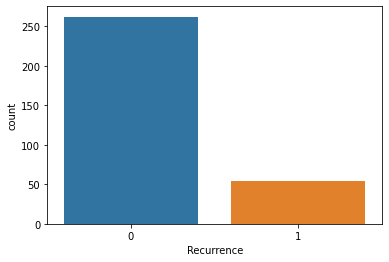

In [12]:
sns.countplot(x="Recurrence", data=blood)

In [17]:
blood_recurrence_count = (blood
                          .groupby('Recurrence')
                          .agg(count_recurrence = ('Recurrence', "count"))
                          .reset_index()
                         )

In [18]:
blood_recurrence_count

,Recurrence,count_recurrence
0,0,262
1,1,54


<AxesSubplot:xlabel='Recurrence', ylabel='count_recurrence'>

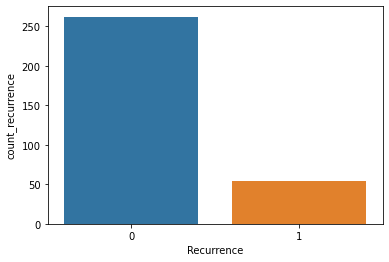

In [19]:
sns.barplot(x="Recurrence", y="count_recurrence", data=blood_recurrence_count)

<AxesSubplot:xlabel='Age', ylabel='Count'>

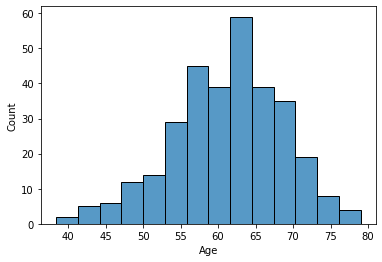

In [20]:
sns.histplot(data=blood, x="Age")

<AxesSubplot:xlabel='Age', ylabel='Count'>

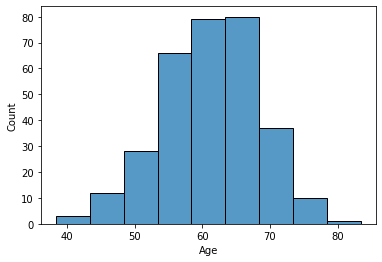

In [21]:
sns.histplot(data=blood, x="Age", binwidth=5)

<AxesSubplot:xlabel='Age', ylabel='Count'>

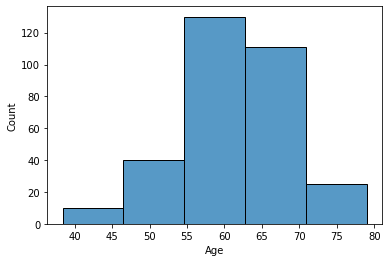

In [22]:
sns.histplot(data=blood, x="Age", bins=5)

<AxesSubplot:xlabel='TVol', ylabel='Age'>

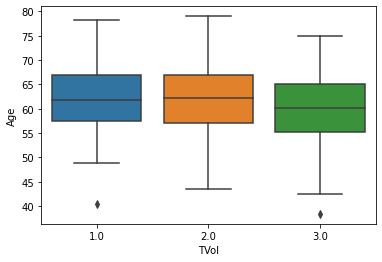

In [23]:
sns.boxplot(x="TVol", y="Age", data=blood)

<AxesSubplot:xlabel='TVol', ylabel='Age'>

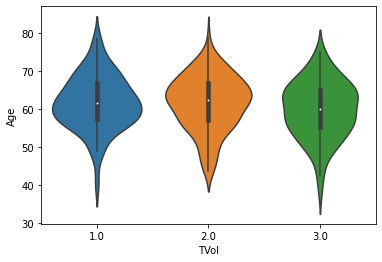

In [25]:
sns.violinplot(x="TVol", y="Age", data=blood)

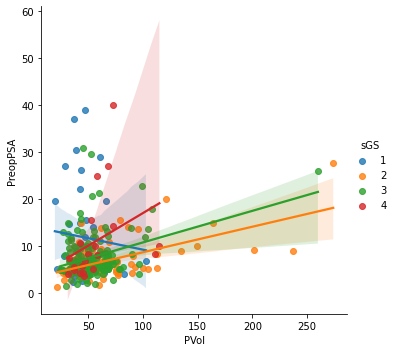

In [28]:
sns.lmplot(x="PVol", y="PreopPSA", data=blood, hue="sGS")

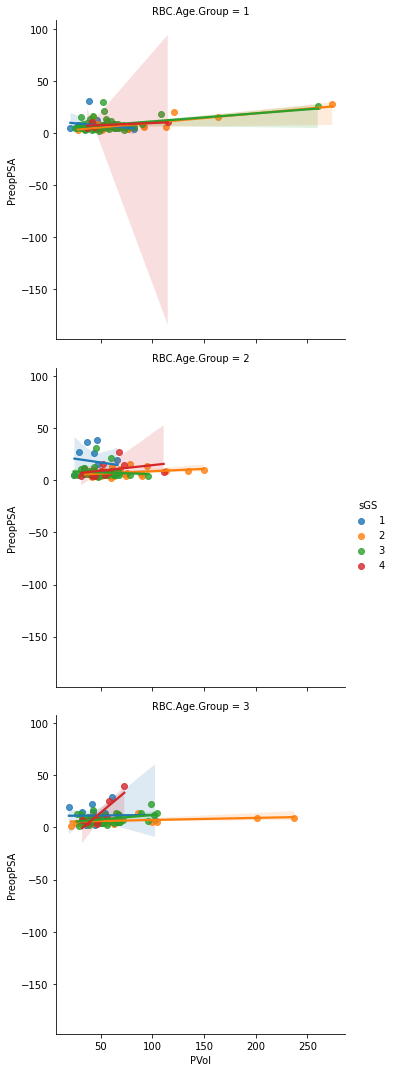

In [29]:
sns.lmplot(x="PVol", y="PreopPSA",
           data=blood,
           hue="sGS",
           row="RBC.Age.Group"
          )

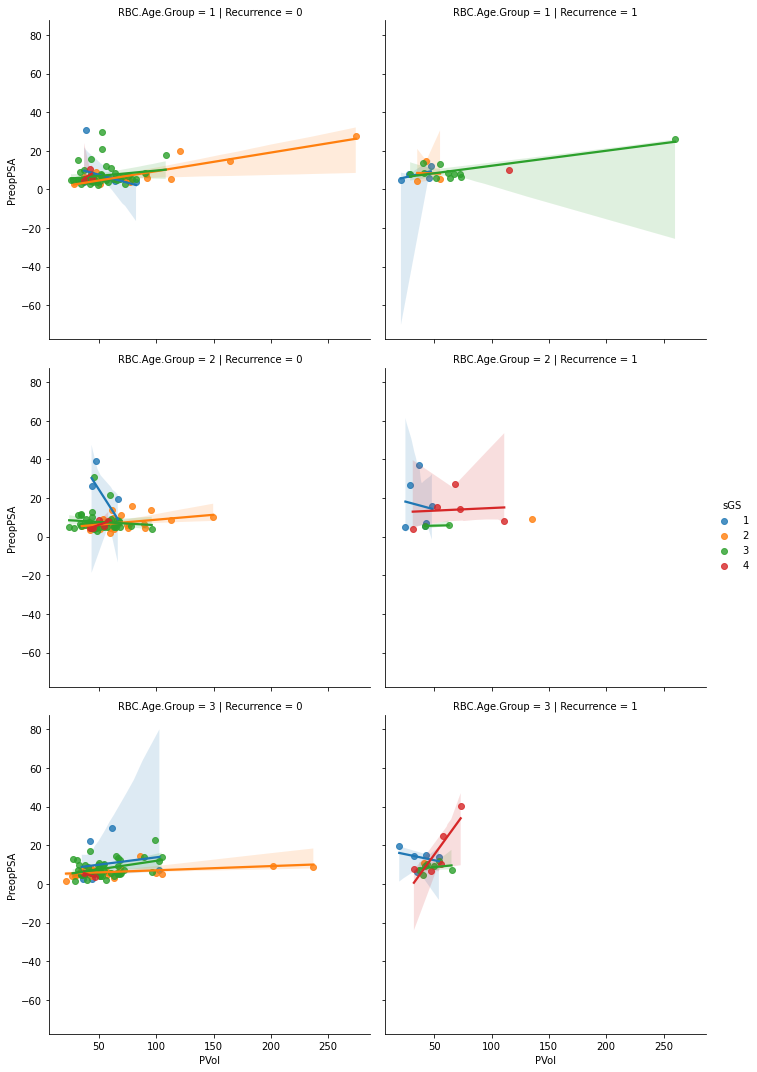

In [30]:
sns.lmplot(x="PVol", y="PreopPSA",
           data=blood,
           hue="sGS",
           row="RBC.Age.Group",
           col="Recurrence"
          )

In [31]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='PVol', ylabel='PreopPSA'>

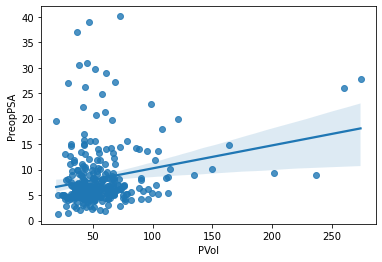

In [34]:
fig, ax = plt.subplots(1, 1)
sns.regplot(x="PVol", y="PreopPSA", data=blood, ax=ax)

In [37]:
fig.savefig("output/scatter.png")

<AxesSubplot:xlabel='Age', ylabel='Count'>

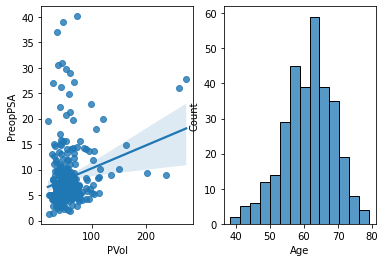

In [38]:
fig, (ax1, ax2) = plt.subplots(1, 2)
sns.regplot(x="PVol", y="PreopPSA", data=blood, ax=ax1)
sns.histplot(x="Age", data=blood, ax=ax2)

In [40]:
fig.savefig("output/2x1.png")